# 1. Introduction.

Welcome to the Exploratory Data Analysis (EDA) notebook for the health and demographic data spanning the period 2014-2015, sourced from the Global Health Observatory Data Repository. In this notebook, I aim to derive insights into various aspects of the dataset, addressing key questions related to missing values, data quality, and demographic indicators. This analysis covers topics such as population demographics, fertility-income relationships, literacy rates, child mortality, life expectancy, and wealth distribution across different regions. Each section is meticulously structured to provide a comprehensive overview of the dataset, with visualizations aiding in the interpretation of  findings. Lets explore the intricacies of the data and unveil meaningful patterns that contribute to a deeper understanding of global health and demographics.

# 2. Data Processing.

## Importing libraries and loading dataframe.

In [10]:
import pandas as pd
import numpy as np
data=r'C:\Users\ITUMELENG\Documents\EXPLORATORY DATA ANALYSIS PROJECT\DATA\RAW_DATA.CSV'
dataframe1=pd.read_csv(data)
print(dataframe1)

                                Country                 Region  Population  \
0                           Afghanistan  Eastern Mediterranean       29825   
1                               Albania                 Europe        3162   
2                               Algeria                 Africa       38482   
3                               Andorra                 Europe          78   
4                                Angola                 Africa       20821   
..                                  ...                    ...         ...   
189  Venezuela (Bolivarian Republic of)               Americas       29955   
190                            Viet Nam        Western Pacific       90796   
191                               Yemen  Eastern Mediterranean       23852   
192                              Zambia                 Africa       14075   
193                            Zimbabwe                 Africa       13724   

     Under15  Over60  FertilityRate  LifeExpectancy  ChildMorta

In [21]:
# Display basic information about the DataFrame
print("Basic Information:")
print(dataframe1.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  

## Handling missing values by mean imputation.

In [22]:
# Check for missing values
print("\nMissing Values:")
print(dataframe1.isnull().sum())


Missing Values:
Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64


In [24]:
# Display missing values before imputation
print("Missing Values Before Imputation:")
print(dataframe1.isnull().sum())



Missing Values Before Imputation:
Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64


In [25]:
# Fill missing values with the mean for each column
dataframe1['FertilityRate'].fillna(dataframe1['FertilityRate'].mean(), inplace=True)
dataframe1['CellularSubscribers'].fillna(dataframe1['CellularSubscribers'].mean(), inplace=True)
dataframe1['GNI'].fillna(dataframe1['GNI'].mean(), inplace=True)
dataframe1['LiteracyRate'].fillna(dataframe1['LiteracyRate'].mean(), inplace=True)
dataframe1['PrimarySchoolEnrollmentMale'].fillna(dataframe1['PrimarySchoolEnrollmentMale'].mean(), inplace=True)
dataframe1['PrimarySchoolEnrollmentFemale'].fillna(dataframe1['PrimarySchoolEnrollmentFemale'].mean(), inplace=True)


In [27]:
# Display missing values after imputation
print("Missing Values After Imputation:")
print(dataframe1.isnull().sum())



Missing Values After Imputation:
Country                          0
Region                           0
Population                       0
Under15                          0
Over60                           0
FertilityRate                    0
LifeExpectancy                   0
ChildMortality                   0
CellularSubscribers              0
LiteracyRate                     0
GNI                              0
PrimarySchoolEnrollmentMale      0
PrimarySchoolEnrollmentFemale    0
dtype: int64


## Cleaning and standardizing dataframe.

In [30]:

Missing Values Before Imputation:
Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64



,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,83.71,1140.00,90.85,89.63
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,83.71,8820.00,90.85,89.63
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,83.71,8310.00,98.20,96.40
3,Andorra,Europe,78,15.20,22.86,2.94,82,3.2,75.49,83.71,13320.93,78.40,79.40
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.10,5230.00,93.10,78.20


# 3. Exploratory Data Analysis.

## Importing libraries

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1 Identify the country with the lowest % of their population under 15 and the one with the highest.

In [33]:

# Identify the country with the lowest percentage of population under 15
lowest_under_15_country = dataframe1.loc[dataframe1['Under15'].idxmin(), 'Country']

# Identify the country with the highest percentage of population under 15
highest_under_15_country = dataframe1.loc[dataframe1['Under15'].idxmax(), 'Country']

# Display the results
print(f"Country with the Lowest Percentage of Population Under 15: {lowest_under_15_country}")
print(f"Country with the Highest Percentage of Population Under 15: {highest_under_15_country}")



Country with the Lowest Percentage of Population Under 15: Japan
Country with the Highest Percentage of Population Under 15: Niger


## 3.2 Which region has the highest % of their population over 60?

In [54]:

# Calculate the mean population percentage over 60 for each region
mean_over_60_by_region = dataframe1.groupby('Region')['Over60'].mean().reset_index()

# Sort the DataFrame by the mean population percentage over 60 in descending order
mean_over_60_by_region = mean_over_60_by_region.sort_values(by='Over60', ascending=False)

# Create a table for the results
result_table_over_60 = pd.DataFrame({
    'Region': mean_over_60_by_region['Region'],
    'Mean % Over 60': mean_over_60_by_region['Over60']
})

# Print the table
print(result_table_over_60)


                  Region  Mean % Over 60
3                 Europe       19.774906
1               Americas       10.943714
5        Western Pacific       10.162963
4        South-East Asia        8.769091
2  Eastern Mediterranean        5.620000
0                 Africa        5.220652


## 3.3 Does fertility decrease as income increases? Are there any countries that don’t seem to follow this relation?

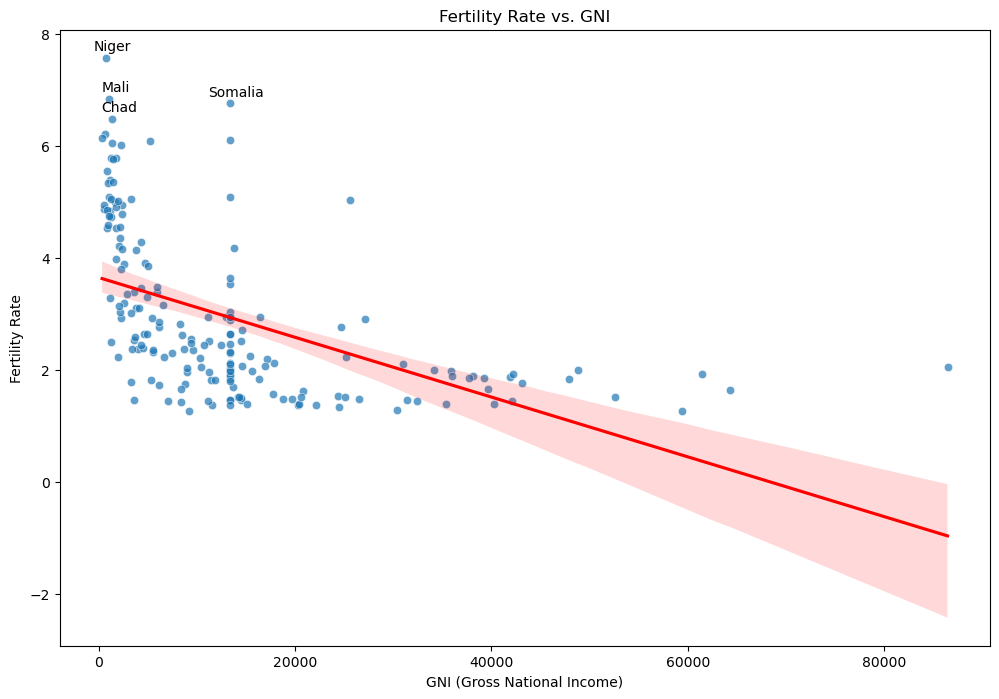

In [52]:

# Scatter plot of Fertility Rate vs. GNI (Gross National Income)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GNI', y='FertilityRate', data=dataframe1, alpha=0.7)

# Fit a regression line to the data
sns.regplot(x='GNI', y='FertilityRate', data=dataframe1, scatter=False, color='red')

# Highlight countries that deviate from the expected relationship (e.g., those with high residuals)
residuals = dataframe1['FertilityRate'] - dataframe1['FertilityRate'].mean()
outliers = dataframe1[residuals.abs() > 3.3]  # Set deviation threshold

# Annotate outliers on the plot with added offset for better visibility
for i, row in outliers.iterrows():
    plt.annotate(row['Country'], (row['GNI'], row['FertilityRate']), textcoords="offset points", xytext=(5,5), ha='center')

# Set plot labels and title
plt.title('Fertility Rate vs. GNI')
plt.xlabel('GNI (Gross National Income)')
plt.ylabel('Fertility Rate')

# Show the plot
plt.show()


## 3.4 Which regions have the lowest literacy rates?

In [53]:

# Group by region and calculate the mean literacy rate
mean_literacy_by_region = dataframe1.groupby('Region')['LiteracyRate'].mean().reset_index()

# Sort the DataFrame by mean literacy rate in ascending order
mean_literacy_by_region = mean_literacy_by_region.sort_values(by='LiteracyRate')

# Display the table
print(mean_literacy_by_region)


                  Region  LiteracyRate
0                 Africa     72.269565
4        South-East Asia     78.287273
2  Eastern Mediterranean     83.169091
5        Western Pacific     85.847407
1               Americas     87.948000
3                 Europe     91.103208


## 3.5 Which regions have the lowest child mortality rates?

In [55]:
# Group by region and calculate the mean child mortality rate
mean_child_mortality_by_region = dataframe1.groupby('Region')['ChildMortality'].mean().reset_index()

# Sort the DataFrame by mean child mortality rate in ascending order
mean_child_mortality_by_region = mean_child_mortality_by_region.sort_values(by='ChildMortality')

# Display the table
print(mean_child_mortality_by_region)

                  Region  ChildMortality
3                 Europe       10.050943
1               Americas       19.322857
5        Western Pacific       24.711111
4        South-East Asia       35.045455
2  Eastern Mediterranean       40.250000
0                 Africa       84.036957


## 3.6 What is the life expectancy across different regions? Create a box-and-whisker plot to investigate this. What can we conclude about life expectancy across different regions?

                  Region  LifeExpectancy
0                 Africa       57.956522
4        South-East Asia       69.363636
2  Eastern Mediterranean       69.590909
5        Western Pacific       72.333333
1               Americas       74.342857
3                 Europe       76.735849


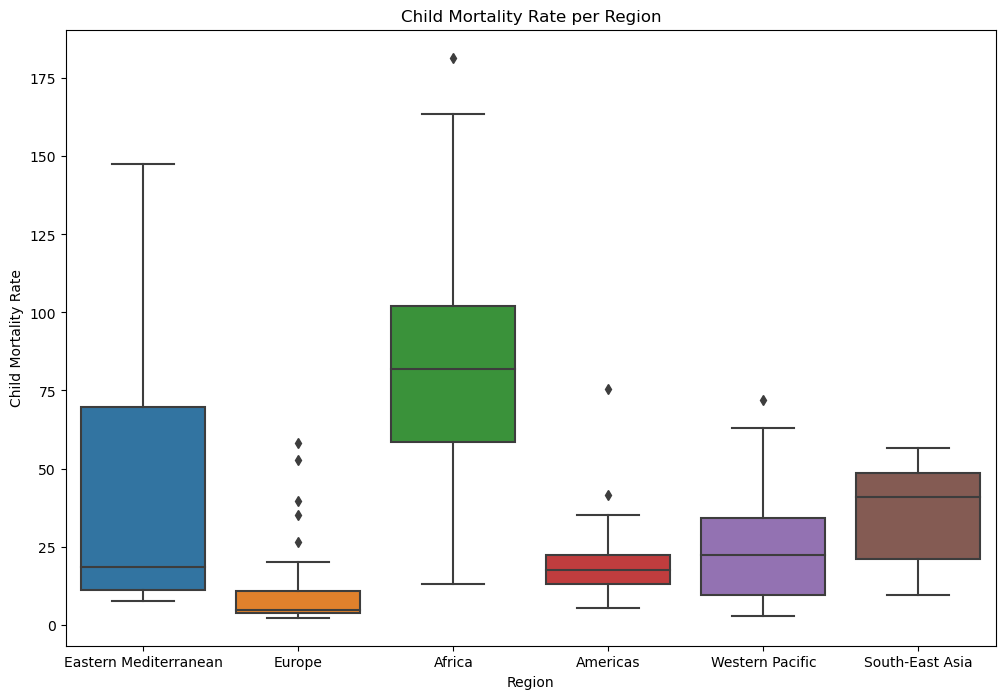

In [56]:
# Table for life expectancy per region
mean_life_expectancy_by_region = dataframe1.groupby('Region')['LifeExpectancy'].mean().reset_index()
mean_life_expectancy_by_region = mean_life_expectancy_by_region.sort_values(by='LifeExpectancy')
print(mean_life_expectancy_by_region)

# Box-and-whisker plot for child mortality per region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='ChildMortality', data=dataframe1)
plt.title('Child Mortality Rate per Region')
plt.xlabel('Region')
plt.ylabel('Child Mortality Rate')
plt.show()

## 3.7 How is life expectancy related to wealth across different regions? How is wealth related to fertility across different regions? Do these relationships hold for African countries?

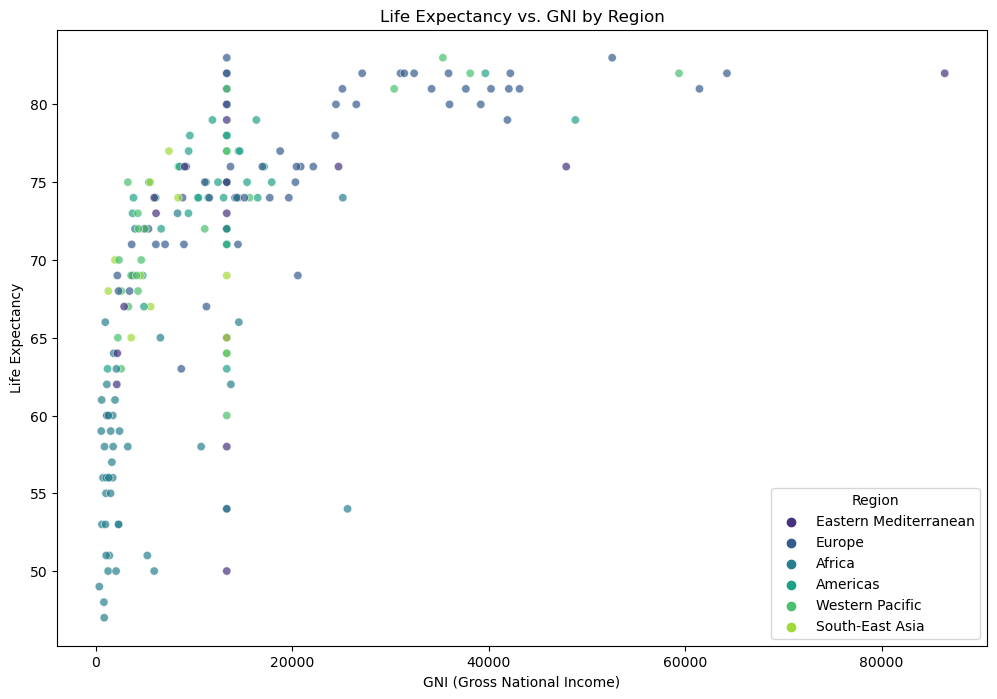

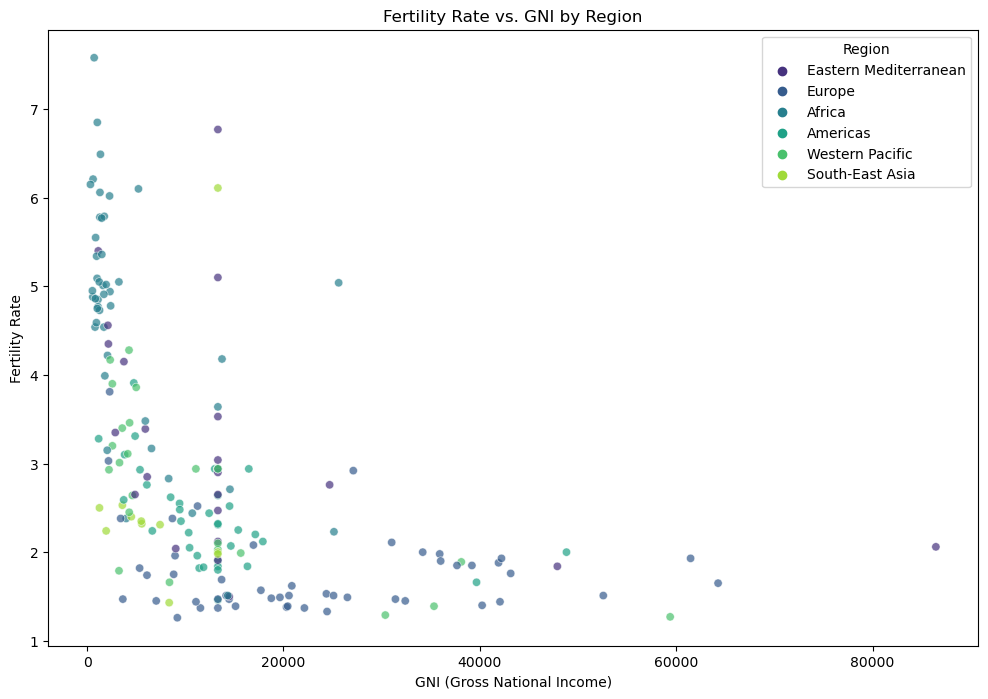

In [57]:
# Scatter plot for Life Expectancy vs. GNI with regions colored and legend
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GNI', y='LifeExpectancy', hue='Region', data=dataframe1, palette='viridis', alpha=0.7, legend='full')
plt.title('Life Expectancy vs. GNI by Region')
plt.xlabel('GNI (Gross National Income)')
plt.ylabel('Life Expectancy')
plt.show()

# Scatter plot for Fertility Rate vs. GNI with regions colored and legend
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GNI', y='FertilityRate', hue='Region', data=dataframe1, palette='viridis', alpha=0.7, legend='full')
plt.title('Fertility Rate vs. GNI by Region')
plt.xlabel('GNI (Gross National Income)')
plt.ylabel('Fertility Rate')
plt.show()

## 3.8 Create appropriate graphs to visually represent the relationship between literacy and life expectancy by region, and then for African countries. What can be concluded from the graphs? How confident can we be in the relationships represented here?

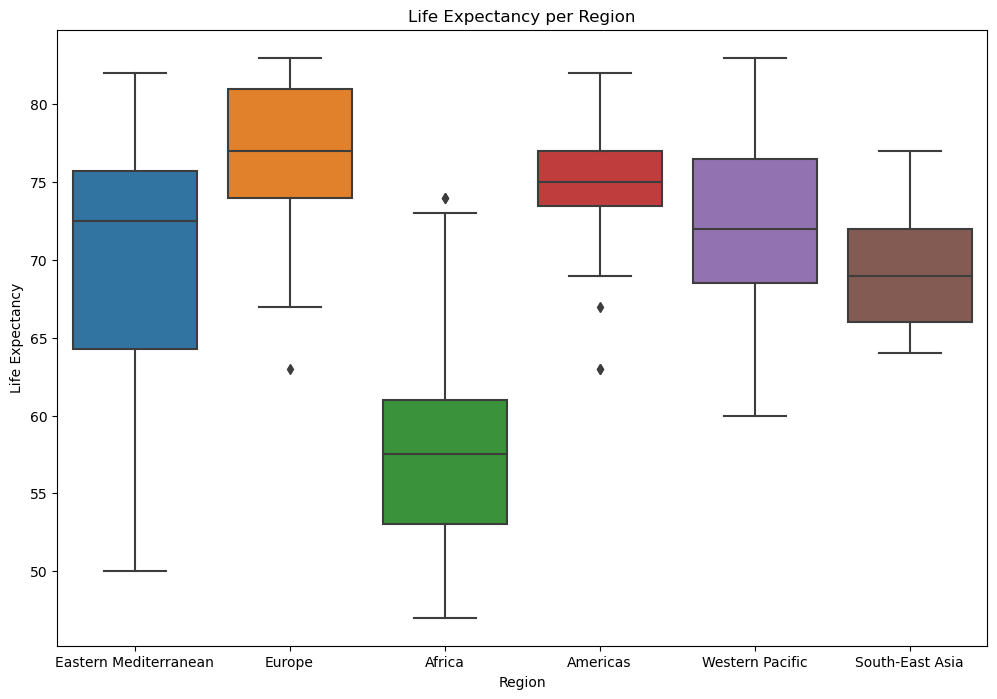

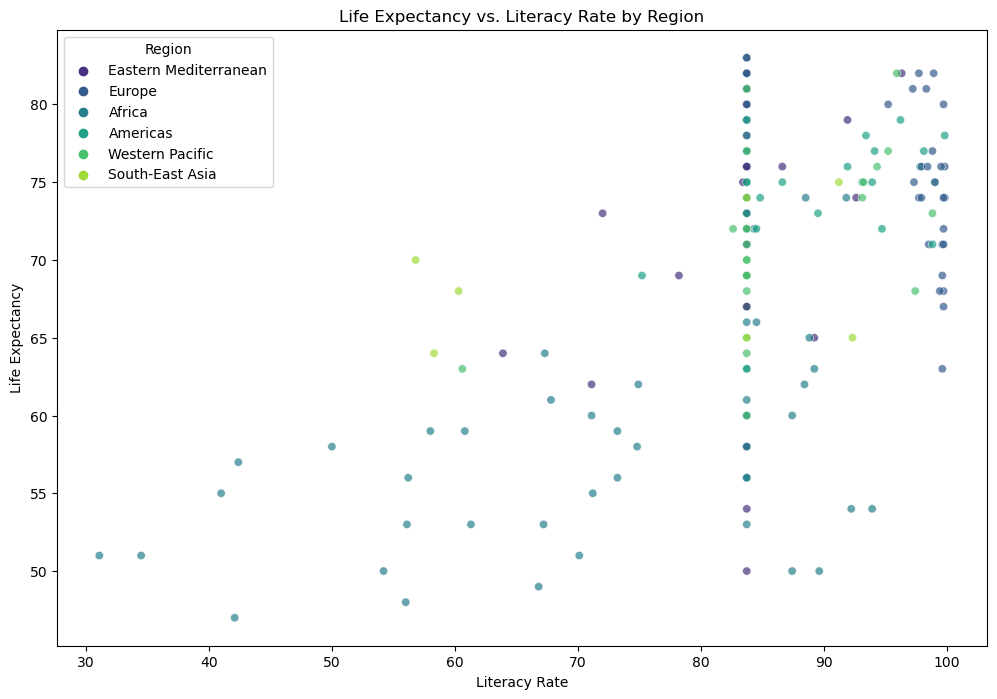

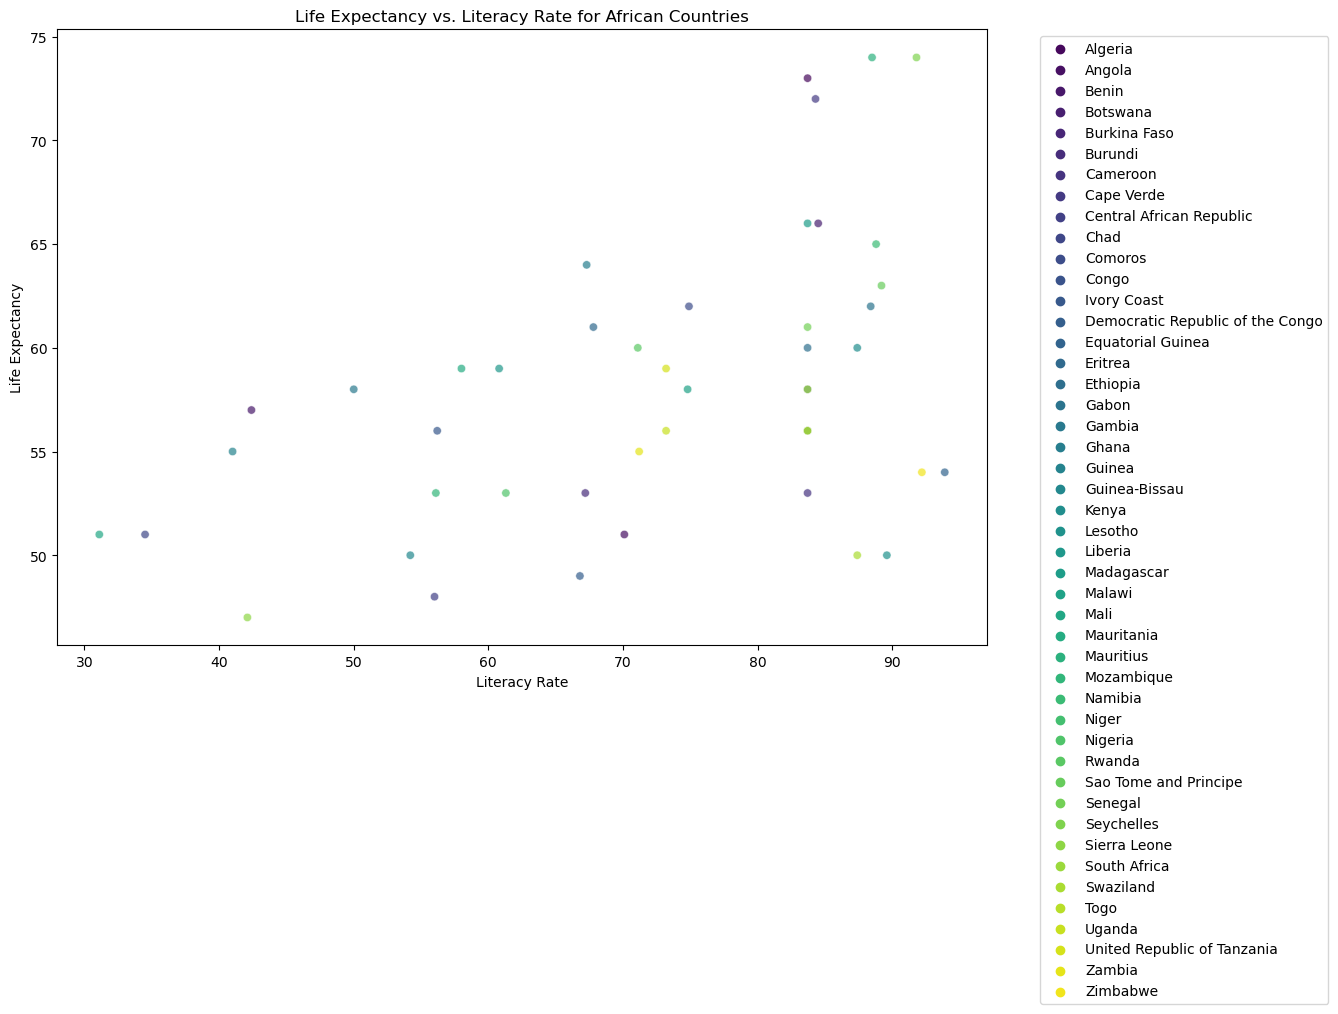

In [59]:
# Box-and-whisker plot for life expectancy per region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='LifeExpectancy', data=dataframe1)
plt.title('Life Expectancy per Region')
plt.xlabel('Region')
plt.ylabel('Life Expectancy')
plt.show()

# Scatter plot for Life Expectancy vs. Literacy Rate with regions colored and legend
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LiteracyRate', y='LifeExpectancy', hue='Region', data=dataframe1, palette='viridis', alpha=0.7, legend='full')
plt.title('Life Expectancy vs. Literacy Rate by Region')
plt.xlabel('Literacy Rate')
plt.ylabel('Life Expectancy')
plt.show()

# Scatter plot for Life Expectancy vs. Literacy Rate for African countries with legend per country
african_countries = dataframe1[dataframe1['Region'] == 'Africa']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='LiteracyRate', y='LifeExpectancy', hue='Country', data=african_countries, palette='viridis', alpha=0.7)
plt.title('Life Expectancy vs. Literacy Rate for African Countries')
plt.xlabel('Literacy Rate')
plt.ylabel('Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

# 4. Conclusion and Insights

## 1. Data Cleaning and Imputation:
### Missing Values Before Imputation:
Identified missing values in key variables such as Fertility Rate, Literacy Rate, GNI, and others.
Utilized mean imputation to fill missing values for improved dataset completeness.
## 2. Key Findings:
### a. Population Demographics:
#### Lowest and Highest Percentage of Population Under 15:
Lowest: Japan
Highest: Niger

#### Region with the Highest Percentage of Population Over 60:
Europe with a mean of 19.77%

### b. Fertility-Income Relationships:
#### Relationship Between Fertility and Income:
Generally, fertility decreases as income increases.
Identified outliers (Niger, Mali, Chad, Somalia) where this relationship does not hold strongly.

### c. Literacy Rates:
#### Regions with the Lowest Literacy Rates:
Africa has the lowest average literacy rate (72.27%).
Followed by South-East Asia, Eastern Mediterranean, Western Pacific, and Americas.

### d. Child Mortality Rates:
#### Regions with the Lowest Child Mortality Rates:
Europe has the lowest average child mortality rate (10.05).
Followed by Americas, Western Pacific, South-East Asia, and Eastern Mediterranean.

### e. Life Expectancy:
#### Life Expectancy Across Different Regions:
Africa has the lowest average life expectancy (57.96).
Followed by South-East Asia, Eastern Mediterranean, Western Pacific, and Americas.
Europe has the highest average life expectancy (76.74).

### f. Relationships Across Regions:
#### Life Expectancy and Wealth:
Life expectancy increases with wealth across different regions.
Wealth and Fertility:

Fertility decreases with increasing wealth across different regions.

### g. Visual Representations:
#### Relationship Between Literacy and Life Expectancy:
Life expectancy tends to increase with higher literacy rates across regions.
Similar trends observed for most African countries.

## 3. Conclusions:
The dataset provides valuable insights into global health and demographics, highlighting variations and trends across different regions.
Key relationships, such as the inverse correlation between fertility and income, and the positive association between literacy and life expectancy, are notable.
Outliers in certain countries and regions emphasize the need for nuanced interpretations and potential targeted interventions.
Visual representations enhance the interpretability of relationships, offering a more comprehensive understanding of the data.

## 4. Recommendations and Future Work:
Future analyses could delve deeper into specific regions or countries to uncover more granular insights.
Consideration of additional variables or external factors may further enrich the analysis.
Regular updates to the dataset and analyses would contribute to ongoing monitoring of global health trends.
In summary, this EDA notebook successfully explores the intricacies of the health and demographic dataset, providing meaningful patterns and insights that contribute to a deeper understanding of global health dynamics.